<a href="https://colab.research.google.com/github/JackSandford/ECK/blob/main/Self_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data

In [14]:
import os
import pandas as pd
import json 
from google.colab import drive
import matplotlib.pyplot as plt

def mount_drive():
  drive.mount('/content/drive', force_remount=True)
  project_dir = "/content/drive/MyDrive/OneHourOfData"
  return project_dir

def unmount_drive():
  drive.flush_and_unmount()
  print('Drive Unmounted')

def get_file_names(project_dir):
  path = os.path.join(os.getcwd(),project_dir)
  filenames = [os.path.join(path,i) for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
  return filenames


project_dir = mount_drive()

filenames = get_file_names(project_dir)
filenames = filenames[:6]

Mounted at /content/drive


In [2]:
regs = pd.read_csv('https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/bus_regs.csv')
ohod = pd.read_json('/content/drive/MyDrive/OneHourOfData/busdata_22-09-07_08-07-48.json')

Creating a pie chart showing percentages of each type of bus

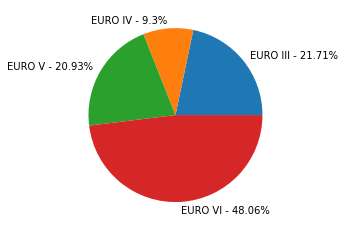

In [69]:
def types_of_buses():
  euro3buses = []
  euro4buses = []
  euro5buses = []
  euro6buses = []
  euro3regslist = []
  euro4regslist = []
  euro5regslist = []
  euro6regslist = []
  mvj = pd.json_normalize(ohod.MonitoredVehicleJourney)
  euro3regs = regs[regs['Emission Class'] == 'EURO III']
  for reg in euro3regs['Last tracked']:
    euro3regslist.append(reg)
  euro4regs = regs[regs['Emission Class'] == 'EURO IV']
  for reg in euro4regs['Last tracked']:
    euro4regslist.append(reg)
  euro5regs = regs[regs['Emission Class'] == 'EURO V']
  for reg in euro5regs['Last tracked']:
    euro5regslist.append(reg)
  euro6regs = regs[regs['Emission Class'] == 'EURO VI']
  for reg in euro6regs['Last tracked']:
    euro6regslist.append(reg)
  euro3buses = mvj[mvj['VehicleRef'].isin(euro3regslist)]
  euro4buses = mvj[mvj['VehicleRef'].isin(euro4regslist)]
  euro5buses = mvj[mvj['VehicleRef'].isin(euro5regslist)]
  euro6buses = mvj[mvj['VehicleRef'].isin(euro6regslist)]
  numbersbuses = (len(euro3buses), len(euro4buses), len(euro5buses), len(euro6buses))
  total_length = len(euro3buses) + len(euro4buses) + len(euro5buses) + len(euro6buses)
  percentage3 = round((len(euro3buses) / total_length) * 100, 2)
  percentage4 = round((len(euro4buses) / total_length) * 100, 2)
  percentage5 = round((len(euro5buses) / total_length) * 100, 2)
  percentage6 = round((len(euro6buses) / total_length) * 100, 2)
  keys = (('EURO III - {}%'.format(percentage3)), ('EURO IV - {}%'.format(percentage4)), ('EURO V - {}%'.format(percentage5)), ('EURO VI - {}%'.format(percentage6)))
  return plt.pie(numbersbuses, labels = keys)
  #return percentage3
types_of_buses()

mvj = pd.json_normalize(ohod.MonitoredVehicleJourney)

#display(euro3regs)

Sorting for EURO III only

In [45]:
def euro_class_only(df, euro):
  euroxbuses = []
  euroxregslist = []
  mvj = pd.json_normalize(df.MonitoredVehicleJourney)
  euroxregs = regs[regs['Emission Class'] == euro]
  for reg in euroxregs['Last tracked']:
    euroxregslist.append(reg)
  euroxbuses = mvj[mvj['VehicleRef'].isin(euroxregslist)]
  return euroxbuses

euro3_buses = euro_class_only(ohod, 'EURO III')
print(len(euro3_buses))

display(euro3_buses)

28


,LineRef,DirectionRef,PublishedLineName,OperatorRef,OriginRef,OriginName,DestinationRef,DestinationName,OriginAimedDepartureTime,DestinationAimedArrivalTime,Bearing,BlockRef,VehicleRef,FramedVehicleJourneyRef.DataFrameRef,FramedVehicleJourneyRef.DatedVehicleJourneyRef,VehicleLocation.Longitude,VehicleLocation.Latitude
2,132,outbound,132,AKSS,249000000823,Hempstead_Valley_Shopping_Centre,249000000311,Grammar_Schools,2022-09-07T07:01:00+00:00,2022-09-07T08:12:00+00:00,183.0,0509,6421,2022-09-07,1020,0.499678,51.374453
22,694,outbound,694,AKSS,2400A017470A,Forge_Lane,249000000311,Grammar_Schools,2022-09-07T07:30:00+00:00,2022-09-07T08:08:00+00:00,236.0,0505,6428,2022-09-07,1001,0.50606,51.384996
23,659,outbound,659,AKSS,249000000637,Bus_Depot,249000000309,Breton_Road,2022-09-07T06:52:00+00:00,2022-09-07T08:07:00+00:00,211.0,0515,6440,2022-09-07,1002,0.509273,51.357056
30,100,inbound,100,AKSS,249000000123,Ship_and_Trades,2490101073,Waterfront_Bus_Station,2022-09-07T08:01:00+00:00,2022-09-07T08:12:00+00:00,193.0,0171,1616,2022-09-07,1001,0.537641,51.402051
34,89,inbound,89,AKSS,2400A022550A,Kings_Head,2400A000290A,Oakwood_Park,2022-09-07T06:43:00+00:00,2022-09-07T08:26:00+00:00,NaN,0527,6438,2022-09-07,1009,0.531008,51.258346
38,6,inbound,6,AKSS,2400A013910A,Railway_Station,2400A073680A,Invicta_Girls__Grammar_School,2022-09-07T06:40:00+00:00,2022-09-07T08:21:00+00:00,42.0,0504,6132,2022-09-07,1001,0.5122,51.270468
40,689,outbound,689,AKSS,249000000010,Darnley_Arch,2490101120,Hundred_of_Hoo_Academy_Grounds,2022-09-07T07:35:00+00:00,2022-09-07T08:11:00+00:00,30.0,0512,6410,2022-09-07,1002,0.512026,51.410111
47,12,inbound,12,AKSS,2400A022950A,The_Vine,2400A000640A,Royal_Star_Arcade,2022-09-07T06:53:00+00:00,2022-09-07T08:06:00+00:00,352.0,0315,6422,2022-09-07,1007,0.522456,51.270128
49,689,outbound,689,AKSS,249000000010,Darnley_Arch,2490101120,Hundred_of_Hoo_Academy_Grounds,2022-09-07T07:33:00+00:00,2022-09-07T08:09:00+00:00,16.0,0510,6431,2022-09-07,1004,0.516593,51.411391
55,633,outbound,633,AKSS,249000000108,Six_Bells,249000000311,Grammar_Schools,2022-09-07T07:22:00+00:00,2022-09-07T08:05:00+00:00,211.0,0506,6419,2022-09-07,1002,0.501256,51.377926


Showing how many EURO III buses on each route there are

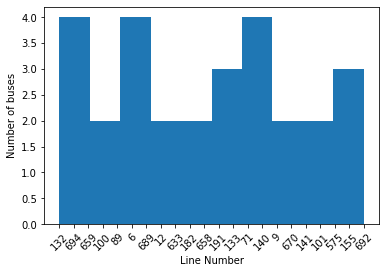

In [65]:
# def hist(df, column):
#   histdict = {}
#   for number in df[column]:
#     if histdict.get(number,0) == 0:
#       histdict[number] = 1
#     elif histdict.get(number,0) > 0:
#       histdict.get(number,0) = histdict.get(number,0) + 1


# hist(euro3_buses, 'LineRef')

def show_hist(df,column):
  plt.hist(df[column])
  plt.xticks(rotation = 45)
  plt.xlabel('Line Number')
  plt.ylabel('Number of buses')
  plt.show()

show_hist(euro3_buses, 'LineRef')

Bar chart of which buses use which lines

In [83]:
def barhist(df, column):
  histdict = {}
  for number in df[column]:
    if histdict.get(number,0) == 0:
      histdict[number] = 1
    elif histdict.get(number,0) > 0:
      histdict[number] = histdict.get(number,0) + 1
  return histdict

histdict3 = barhist(euro3_buses, 'LineRef')

def drawbar():
  stack = pd.DataFrame()
  stack['Line'] = mvj['LineRef']
  #stack['EURO III'] = histdict3
  #histdict30 = {k:[v] for k,v in histdict3.items()}
  hist3 = pd.DataFrame(histdict3.items(), columns=['Line', 'EURO III'])
  stack3 = pd.merge(hist3, stack, how = 'outer')
  display(stack3)

drawbar()


,Line,EURO III
0,132,2.0
1,132,2.0
2,132,2.0
3,132,2.0
4,132,2.0
...,...,...
127,693,NaN
128,X2,NaN
129,660,NaN
130,647,NaN


In [67]:
display(euro3_buses)

,LineRef,DirectionRef,PublishedLineName,OperatorRef,OriginRef,OriginName,DestinationRef,DestinationName,OriginAimedDepartureTime,DestinationAimedArrivalTime,Bearing,BlockRef,VehicleRef,FramedVehicleJourneyRef.DataFrameRef,FramedVehicleJourneyRef.DatedVehicleJourneyRef,VehicleLocation.Longitude,VehicleLocation.Latitude
2,132,outbound,132,AKSS,249000000823,Hempstead_Valley_Shopping_Centre,249000000311,Grammar_Schools,2022-09-07T07:01:00+00:00,2022-09-07T08:12:00+00:00,183.0,0509,6421,2022-09-07,1020,0.499678,51.374453
22,694,outbound,694,AKSS,2400A017470A,Forge_Lane,249000000311,Grammar_Schools,2022-09-07T07:30:00+00:00,2022-09-07T08:08:00+00:00,236.0,0505,6428,2022-09-07,1001,0.50606,51.384996
23,659,outbound,659,AKSS,249000000637,Bus_Depot,249000000309,Breton_Road,2022-09-07T06:52:00+00:00,2022-09-07T08:07:00+00:00,211.0,0515,6440,2022-09-07,1002,0.509273,51.357056
30,100,inbound,100,AKSS,249000000123,Ship_and_Trades,2490101073,Waterfront_Bus_Station,2022-09-07T08:01:00+00:00,2022-09-07T08:12:00+00:00,193.0,0171,1616,2022-09-07,1001,0.537641,51.402051
34,89,inbound,89,AKSS,2400A022550A,Kings_Head,2400A000290A,Oakwood_Park,2022-09-07T06:43:00+00:00,2022-09-07T08:26:00+00:00,NaN,0527,6438,2022-09-07,1009,0.531008,51.258346
38,6,inbound,6,AKSS,2400A013910A,Railway_Station,2400A073680A,Invicta_Girls__Grammar_School,2022-09-07T06:40:00+00:00,2022-09-07T08:21:00+00:00,42.0,0504,6132,2022-09-07,1001,0.5122,51.270468
40,689,outbound,689,AKSS,249000000010,Darnley_Arch,2490101120,Hundred_of_Hoo_Academy_Grounds,2022-09-07T07:35:00+00:00,2022-09-07T08:11:00+00:00,30.0,0512,6410,2022-09-07,1002,0.512026,51.410111
47,12,inbound,12,AKSS,2400A022950A,The_Vine,2400A000640A,Royal_Star_Arcade,2022-09-07T06:53:00+00:00,2022-09-07T08:06:00+00:00,352.0,0315,6422,2022-09-07,1007,0.522456,51.270128
49,689,outbound,689,AKSS,249000000010,Darnley_Arch,2490101120,Hundred_of_Hoo_Academy_Grounds,2022-09-07T07:33:00+00:00,2022-09-07T08:09:00+00:00,16.0,0510,6431,2022-09-07,1004,0.516593,51.411391
55,633,outbound,633,AKSS,249000000108,Six_Bells,249000000311,Grammar_Schools,2022-09-07T07:22:00+00:00,2022-09-07T08:05:00+00:00,211.0,0506,6419,2022-09-07,1002,0.501256,51.377926
